In [1]:
import pandas as pd
import seaborn as sns
import os
import os.path as osp
import matplotlib.pyplot as plt
import collections

In [39]:
path = "results_no_bias/density_0.01/cifar10/resnet34/csv"
seeds = ['1', '2', '3']
gname = 'graph_seed-'
sname = 'summary-'
density = path.split('/')[1].split('_')[-1]

In [40]:
def get_csv(seed):
    graphs = pd.read_csv(osp.join(path, gname+seed+'.csv'))
    summary = pd.read_csv(osp.join(path, sname+seed+'.csv'))
    graphs['ram_crit'] = graphs[['rm', 'sm']].max(axis=1)
    graphs.loc[graphs.sparsity == 1.0, 'ram_crit'] = 1.0
    
    return graphs, summary

In [41]:
graphs, summary = get_csv('1')

In [42]:
def savefig(dst, title):
    os.makedirs(dst, exist_ok=True)
    plt.savefig(osp.join(dst, title+'.png'))
    
def line_plot(m:pd.DataFrame, x:str, y:str, hue:str, dst:str=None, filter_by = None,title:str=None, ylim=(-1, 1)):
    # c = sns.color_palette("flare", as_cmap=True)\
    plt.figure(figsize=(12,8))
    if filter_by:
        masks = None
        for cond in filter_by:
            mask = m.prune_type.str.contains(cond)
            if masks is None: masks=mask
            else:
                masks |= mask
        m = m[masks]
    g= sns.lineplot(data=m,x=x,y=y,hue=hue,)
    plt.xticks(rotation=90)
    if title:
        g.set(title=title)
    plt.ylim(ylim)
    if dst:
        savefig(dst, title)
        
def bar_plot(m:pd.DataFrame, x:str, y:str, dst:str=None, filter_by = None,title:str=None, ylim=(-1, 1), op='max'):
    # c = sns.color_palette("flare", as_cmap=True)\
    plt.figure(figsize=(12,8))
    if filter_by:
        masks = None
        for cond in filter_by:
            mask = m.prune_type.str.contains(cond)
            if masks is None: masks=mask
            else:
                masks |= mask
        m = m[masks]
    df = collections.defaultdict(list)
    for cat in m[x].unique():
        df[x].append(cat)
        if op == 'max':
            df[y].append(m.loc[m[x] == cat][y].max())
        elif op == 'min':
            df[y].append(m.loc[m[x] == cat][y].min())
        elif op == 'mean':
            df[y].append(m.loc[m[x] == cat][y].mean())
        else:
            raise NotImplementedError

    df = pd.DataFrame.from_dict(df)
    df = df.sort_values(by=[y])
    g = sns.barplot(data=df, x=x, y=y)
    for i in g.containers:
        g.bar_label(i,)
    if title:
        g.set(title=title)
    plt.ylim(ylim)
    if dst:
        savefig(dst, title)
    

In [43]:
filter_by = ['Rand', 'GraSP', 'iterSNIP', 'SNIP', 'SynFlow', 'PHEW', 'ERK']

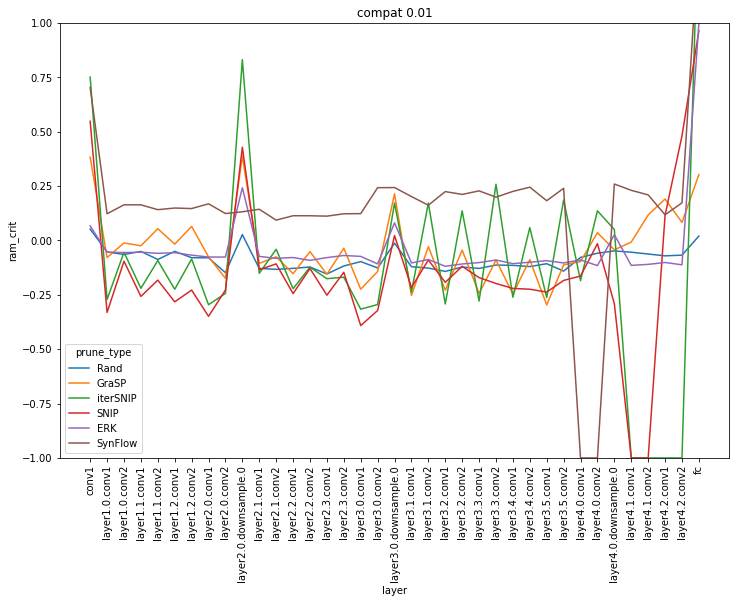

In [48]:
line_plot(graphs, x='layer', y='ram_crit', hue='prune_type', title=f'compat {density}', filter_by=filter_by, ylim=(-1, 1), dst=None)

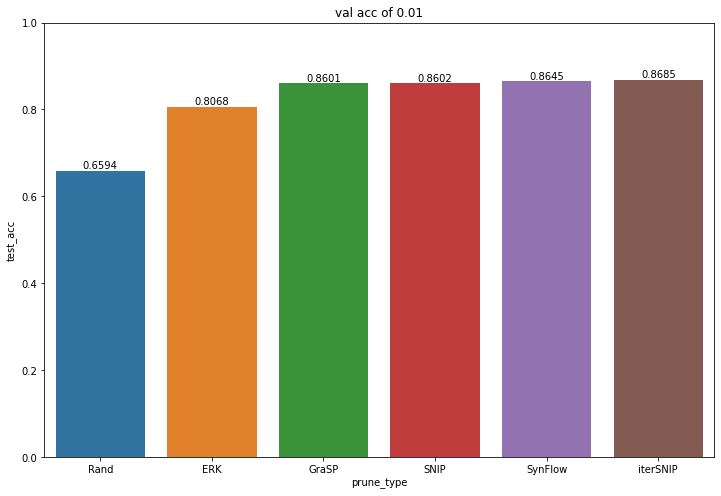

In [49]:
bar_plot(summary, x='prune_type', y='test_acc', title=f'val acc of {density}', ylim=(-0.0, 1),  filter_by=filter_by, dst='figures', op='max')

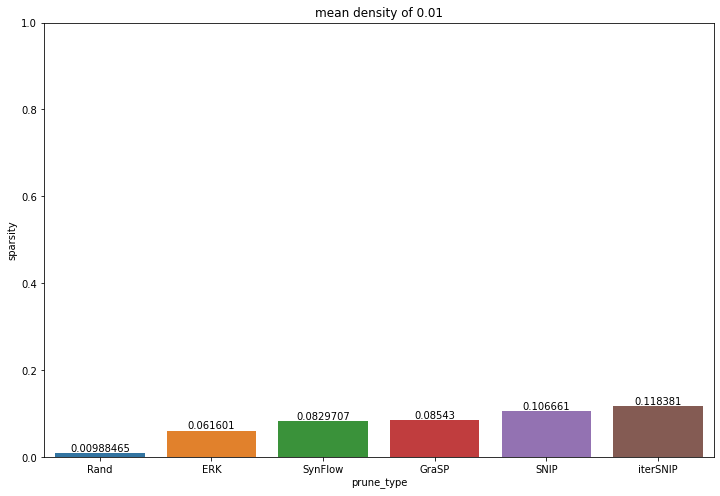

In [12]:
bar_plot(graphs, x='prune_type', y='sparsity', title=f'mean density of {density}', ylim=(-0.0, 1),  filter_by=filter_by, op='mean', dst='figures')

In [51]:
graphs.loc[graphs.prune_type == 'SynFlow']

,prune_type,layer,sparsity,sm,rm,sw,rw,t1m,t1w,copeland_score,compatibility,overlap_coefs,ram_crit
185,SynFlow,conv1,0.638712,0.676695,0.703634,2.992092,1.481439e+01,62.627121,5.054269e+00,0.463298,1.000000,0.000000,0.703634
186,SynFlow,layer1.0.conv1,0.246609,0.068882,0.122838,2.411670,1.951772e+01,56.993217,2.708387e+00,1.311875,0.981132,0.001736,0.122838
187,SynFlow,layer1.0.conv2,0.227186,0.164044,0.154187,3.010750,1.974288e+01,58.790321,3.124135e+00,1.090371,1.000000,0.004521,0.164044
188,SynFlow,layer1.1.conv1,0.235596,0.160406,0.163902,2.781399,1.892483e+01,59.615238,3.123925e+00,0.994659,1.000000,0.006237,0.163902
189,SynFlow,layer1.1.conv2,0.231988,0.141723,0.134776,3.064519,2.137914e+01,59.758018,2.914687e+00,4.943744,0.811321,0.002288,0.141723
190,SynFlow,layer1.2.conv1,0.231337,0.149287,0.142996,2.949417,1.873011e+01,59.517418,3.319126e+00,1.071800,1.000000,0.001153,0.149287
191,SynFlow,layer1.2.conv2,0.232476,0.146793,0.139679,3.101839,2.326462e+01,59.898674,2.662306e+00,1.113172,0.980392,0.002134,0.146793
192,SynFlow,layer2.0.conv1,0.117432,0.168664,-0.077239,2.998615,1.713654e+01,57.873104,2.723517e+00,0.439676,0.474576,0.002845,0.168664
193,SynFlow,layer2.0.conv2,0.058377,0.123960,-0.197017,2.965061,1.549195e+01,56.905346,2.649378e+00,1.004317,1.000000,0.000000,0.123960
194,SynFlow,layer2.0.downsample.0,0.035645,0.131995,-0.284500,-1.000000,6.438710e+00,6.704871,5.507696e-01,3.454376,1.000000,1.000000,0.131995
